## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

# import useful functions from the source code
%aimport features.build_features
from features.build_features import sorted_features

## load data

In [3]:
# load features
features = pd.read_csv('../data/raw/dengue_features_train.csv')

In [4]:
features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [5]:
features.shape

(1456, 24)

In [6]:
# load labels
labels = pd.read_csv('../data/raw/dengue_labels_train.csv')

In [7]:
labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [8]:
labels.shape

(1456, 4)

In [9]:
# bring into one main dataframe to explore relationship
df = pd.merge(labels, features, how='left', on=['city', 'year', 'weekofyear'])

In [10]:
df.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [11]:
df.shape

(1456, 25)

## data exploration

** trends over time in total cases by city**

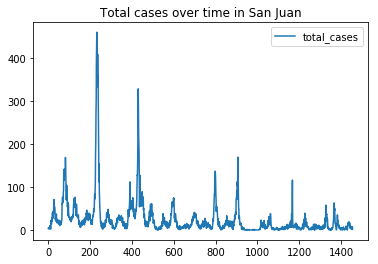

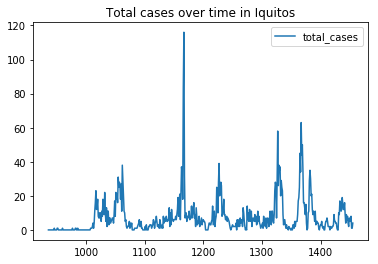

In [12]:
# plot for sj
df[['city', 'total_cases', 'week_start_date']].plot(title='Total cases over time in San Juan')
df[df.city=='iq'][['total_cases', 'week_start_date']].plot(title='Total cases over time in Iquitos');

In [13]:
df[df.city=='sj'][['total_cases', 'week_start_date']].head()

,total_cases,week_start_date
0,4,1990-04-30
1,5,1990-05-07
2,4,1990-05-14
3,3,1990-05-21
4,6,1990-05-28


In [14]:
df[df.city=='sj'][['total_cases', 'week_start_date']].tail()

,total_cases,week_start_date
931,4,2008-03-25
932,3,2008-04-01
933,1,2008-04-08
934,3,2008-04-15
935,5,2008-04-22


In [15]:
df[df.city=='iq'][['total_cases', 'week_start_date']].head()

,total_cases,week_start_date
936,0,2000-07-01
937,0,2000-07-08
938,0,2000-07-15
939,0,2000-07-22
940,0,2000-07-29


In [16]:
df[df.city=='iq'][['total_cases', 'week_start_date']].tail()

,total_cases,week_start_date
1451,5,2010-05-28
1452,8,2010-06-04
1453,1,2010-06-11
1454,1,2010-06-18
1455,4,2010-06-25


A few observations:
- sj data ranges from 1990 to 2008 while iq ranges from 2000 to 2010; so some overlap but sj series is much long

**variable type and missing values**

In [17]:
df.info()
# mostly numeric, with exception of city and week start date

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
total_cases                              1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_

In [18]:
# let's create dummy variable for city
# new variable where 1 correponds to sj
df['sj'] = df['city'].map(lambda x: 1 if x=='sj' else 0)
# drop original city
df.drop('city', axis=1, inplace = True)

In [19]:
# convert week start date to parsed date
# NOTE: check consistency between week start date and week of year
df['date'] = pd.to_datetime(df.week_start_date)

In [20]:
df.date.head()

0   1990-04-30
1   1990-05-07
2   1990-05-14
3   1990-05-21
4   1990-05-28
Name: date, dtype: datetime64[ns]

In [21]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [22]:
# confirm years align
df['year2'] = df['date'].dt.year
df['year'].equals(df['year2'])

True

In [23]:
# confirm weekofyear aligns
df.weekofyear.head()

0    18
1    19
2    20
3    21
4    22
Name: weekofyear, dtype: int64

In [24]:
df['date'].map(datetime.date.isocalendar).head()

0    (1990, 18, 1)
1    (1990, 19, 1)
2    (1990, 20, 1)
3    (1990, 21, 1)
4    (1990, 22, 1)
Name: date, dtype: object

In [25]:
# drop unnecessary date columns now so entire dataframe is numeric
df.drop(['year', 'weekofyear', 'week_start_date', 'date'], axis=1, inplace = True)
# doing it this way so year variable is at end of df, with total_cases (y) the first column
df.rename(columns={'year2': 'year'}, inplace = True)

In [26]:
df.head()

,total_cases,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,sj,month,day,year
0,4,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,1,4,30,1990
1,5,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,1,5,7,1990
2,4,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,1,5,14,1990
3,3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,1,5,21,1990
4,6,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,1,5,28,1990


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
total_cases                              1456 non-null int64
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip_amt_kg_per_m2          1446 non-null float64
reanalysis_relative_humidity_percent     1446 non-null float64
reanalysis_sat_precip_amt_mm             1443 non-null float64
reanalysis_sp

In [28]:
# most missing values appear to be in ndvi_ne

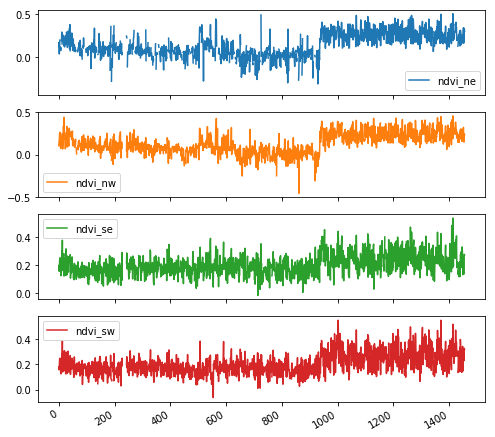

In [29]:
df[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].plot(subplots=True, figsize = (8,8));

In [30]:
# let's look at correlations, ignoring missing values for no
ndvi_df = df[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].dropna()

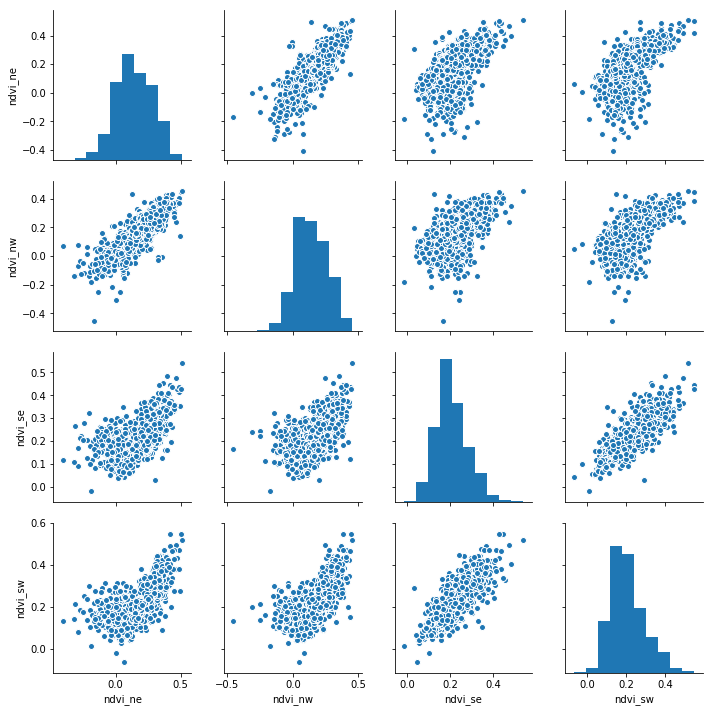

In [31]:
sns.pairplot(ndvi_df)

In [32]:
ndvi_df.corr()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
ndvi_ne,1.000000,0.850902,0.613246,0.669680
ndvi_nw,0.850902,1.000000,0.574594,0.668848
ndvi_se,0.613246,0.574594,1.000000,0.821063
ndvi_sw,0.669680,0.668848,0.821063,1.000000


Strong correlation between NE and NW; similarly strong correlation between SE and SW. Interesting that correlations hold for East-West relationship but less strongly for North-South. Most dissimilar are SE and NW (0.57) -- likely best to include for modeling

**preliminary sense of feature importance**

In [33]:
# sort by date so can do test train split
df.sort_values(['year', 'month', 'day'], inplace = True)

# drop all nulls just for first pass
df.dropna(inplace = True)

In [34]:
y = np.ravel(df.iloc[:, 0])

In [35]:
X = df.iloc[:, 1:]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
rf = RandomForestRegressor()

In [38]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
# not concerned with this
rf.score(X_test, y_test)

0.5087017667670682

In [41]:
# just want to see feature importances
sorted_features(rf, X_train)

('year', 0.18663364516099884)
('reanalysis_dew_point_temp_k', 0.1428993760864164)
('reanalysis_min_air_temp_k', 0.0969196335205662)
('month', 0.09064623386228517)
('reanalysis_air_temp_k', 0.0698790638027065)
('station_precip_mm', 0.0508753461612869)
('station_avg_temp_c', 0.048250117596589516)
('reanalysis_relative_humidity_percent', 0.031439168445151454)
('ndvi_ne', 0.027336948094735858)
('reanalysis_tdtr_k', 0.027324078543438202)
('reanalysis_specific_humidity_g_per_kg', 0.027303990363540625)
('reanalysis_max_air_temp_k', 0.02562992056648637)
('reanalysis_precip_amt_kg_per_m2', 0.023565489821091)
('precipitation_amt_mm', 0.02279973273360901)
('reanalysis_sat_precip_amt_mm', 0.021583096206989207)
('ndvi_nw', 0.019708246902265202)
('reanalysis_avg_temp_k', 0.01687128883363114)
('ndvi_sw', 0.016286553052850705)
('station_diur_temp_rng_c', 0.016197704303221323)
('ndvi_se', 0.015651585032604824)
('day', 0.009943234586887525)
('station_min_temp_c', 0.006301719135068523)
('station_max_temp